In [292]:
import sys
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('IBM/train_ctrUa4K.csv')
columnNames = pd.Series(df.columns.values) # to check the columns/variables/features present in our data set
# xóa những trường thiếu giá trị
df.dropna(axis=0, how='any', inplace=True)
df = df.drop(['Loan_ID'], axis=1)
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
388,Male,Yes,0,Graduate,No,2333,2417.0,136.0,360.0,1.0,Urban,Y
351,Male,No,0,Graduate,No,8750,4167.0,308.0,360.0,1.0,Rural,N
211,Male,Yes,3+,Graduate,No,3430,1250.0,128.0,360.0,0.0,Semiurban,N
116,Female,Yes,0,Graduate,No,3167,2283.0,154.0,360.0,1.0,Semiurban,Y
25,Male,Yes,0,Graduate,Yes,9560,0.0,191.0,360.0,1.0,Semiurban,Y


In [294]:
#xu ly du lieu chu thanh so
df['Gender'] = df['Gender'].replace(['Male','Female'],[1,0])
df['Married'] = df['Married'].replace(['Yes','No'],[1,0]) 
df['Education'] = df['Education'].replace(['Graduate','Not Graduate'],[1,0]) 
df['Self_Employed'] = df['Self_Employed'].replace(['Yes','No'],[1,0])  
df['Property_Area'] = df['Property_Area'].replace(['Rural','Urban','Semiurban'],[0,1,2])  
df['Loan_Status'] = df['Loan_Status'].replace(['Y','N'],[1,0])  
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [296]:
# đổi dữ liệu sang float
df['Gender'] = df['Gender'].astype(int)
df['Married'] = df['Married'].astype(int)

df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce')

df['Education'] = df['Education'].astype(int)
df['Self_Employed'] = df['ApplicantIncome'].astype(int)
df['ApplicantIncome'] = df['ApplicantIncome'].astype(int)
df['CoapplicantIncome'] = df['CoapplicantIncome'].astype(int)
df['LoanAmount'] = df['LoanAmount'].astype(int)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(int)
df['Credit_History'] = df['Credit_History'].astype(int)
df['Property_Area'] = df['Property_Area'].astype(int)
df['Loan_Status'] = df['Loan_Status'].astype(int)
# df['Loan_Status              '] = df['Loan_Status'].astype(int)
df.dropna(axis=0, how='any', inplace=True)

df.dtypes

Gender                 int32
Married                int32
Dependents           float64
Education              int32
Self_Employed          int32
ApplicantIncome        int32
CoapplicantIncome      int32
LoanAmount             int32
Loan_Amount_Term       int32
Credit_History         int32
Property_Area          int32
Loan_Status            int32
dtype: object

In [298]:
af_1 = df.drop('Loan_Status',axis=1)
X_train, X_test,y_train, y_test = train_test_split(af_1,df['Loan_Status'])
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
612,1,1,2.0,1,7583,7583,0,187,360,1,1
478,1,1,1.0,1,16667,16667,2250,86,360,1,2
520,1,1,2.0,0,2192,2192,1742,45,360,1,2
64,0,0,0.0,1,4166,4166,0,116,360,0,2
349,1,1,0.0,1,2625,2625,6250,187,360,1,0
...,...,...,...,...,...,...,...,...,...,...,...
514,1,0,0.0,1,5815,5815,3666,311,360,1,0
521,1,0,0.0,1,2500,2500,0,55,360,1,2
609,0,0,0.0,1,2900,2900,0,71,360,1,0
311,1,0,0.0,0,2927,2927,2405,111,360,1,2


In [300]:
logi = LogisticRegression()
logi.fit(X_train,y_train)
# ĐỘ CHÍNH XÁC CỦA THUẬT TOÁN
logi.score(X_test, y_test)

0.8090909090909091

In [301]:
# ĐỘ CHÍNH XÁC CỦA THUẬT TOÁN
logi.score(X_test, y_test)

0.8090909090909091

In [302]:
#logi là thuật toán, predict hàm test giá trị
df['test'] = pd.DataFrame(logi.predict(X_test))

# asasd.dtypes
df[0:110]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,test
1,1,1,1.0,1,4583,4583,1508,128,360,1,0,0,1.0
2,1,1,0.0,1,3000,3000,0,66,360,1,1,1,1.0
3,1,1,0.0,0,2583,2583,2358,120,360,1,1,1,0.0
4,1,0,0.0,1,6000,6000,0,141,360,1,1,1,1.0
5,1,1,2.0,1,5417,5417,4196,267,360,1,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0,0,0.0,1,10000,10000,1666,225,360,1,0,0,NaN
149,1,1,0.0,1,4860,4860,830,125,360,1,2,1,NaN
150,1,0,0.0,1,6277,6277,0,118,360,0,0,0,NaN
151,1,1,0.0,1,2577,2577,3750,152,360,1,0,1,NaN


In [303]:
# Loan_ID = 
# Gender =
# Married =
# Dependents =
# Education =
# Self_Employed =
# ApplicantIncome =
# CoapplicantIncome =
# LoanAmount =
# Loan_Amount_Term =
# Credit_History =
# Property_Area =
X_test.astype(int)
df['test'] = pd.DataFrame(logi.predict(X_test))

# asasd.dtypes
df


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,test
1,1,1,1.0,1,4583,4583,1508,128,360,1,0,0,1.0
2,1,1,0.0,1,3000,3000,0,66,360,1,1,1,1.0
3,1,1,0.0,0,2583,2583,2358,120,360,1,1,1,0.0
4,1,0,0.0,1,6000,6000,0,141,360,1,1,1,1.0
5,1,1,2.0,1,5417,5417,4196,267,360,1,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,1,1,0.0,1,3232,3232,1950,108,360,1,0,1,NaN
609,0,0,0.0,1,2900,2900,0,71,360,1,0,1,NaN
611,1,1,1.0,1,8072,8072,240,253,360,1,1,1,NaN
612,1,1,2.0,1,7583,7583,0,187,360,1,1,1,NaN


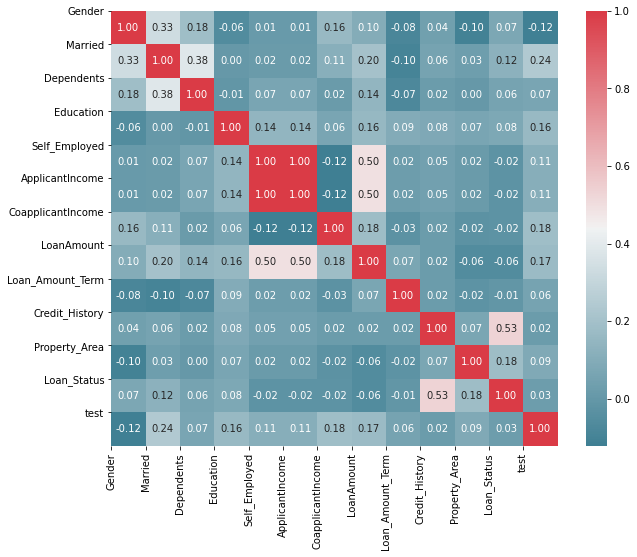

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,test,Gender_0,Gender_1,Married_0,Married_1
1,1.0,1,4583,4583,1508,128,360,1,0,0,1.0,0,1,0,1
2,0.0,1,3000,3000,0,66,360,1,1,1,1.0,0,1,0,1
3,0.0,0,2583,2583,2358,120,360,1,1,1,0.0,0,1,0,1
4,0.0,1,6000,6000,0,141,360,1,1,1,1.0,0,1,1,0
5,2.0,1,5417,5417,4196,267,360,1,1,1,1.0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,0.0,1,3232,3232,1950,108,360,1,0,1,NaN,0,1,0,1
609,0.0,1,2900,2900,0,71,360,1,0,1,NaN,1,0,1,0
611,1.0,1,8072,8072,240,253,360,1,1,1,NaN,0,1,0,1
612,2.0,1,7583,7583,0,187,360,1,1,1,NaN,0,1,0,1


In [304]:
#Create Correlation matrix
# Tạo ma trận Tương quan
corr = df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10,8))
#Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()
#encoding
df=pd.get_dummies(df, columns=['Gender','Married'])
df


In [305]:
df1 = pd.read_csv('IBM/train_ctrUa4K.csv')
#xu ly du lieu chu thanh so
# df1['Gender'] = df1['Gender'].replace(['Male','Female'],[1,0])
# df1['Married'] = df1['Married'].replace(['Yes','No'],[1,0]) 
# df1['Education'] = df1['Education'].replace(['Graduate','Not Graduate'],[1,0]) 
# df1['Self_Employed'] = df1['Self_Employed'].replace(['Yes','No'],[1,0])  
# df1['Property_Area'] = df1['Property_Area'].replace(['Rural','Urban','Semiurban'],[0,1,2])  
# df1['Loan_Status'] = df1['Loan_Status'].replace(['Y','N'],[1,0])  

# # đổi dữ liệu sang int
# df1['Gender'] = df1['Gender'].astype(int)
# df1['Married'] = df1['Married'].astype(int)

# df1['Dependents'] = pd.to_numeric(df1['Dependents'], errors='coerce')

# df1['Education'] = df1['Education'].astype(int)
# df1['Self_Employed'] = df1['ApplicantIncome'].astype(int)
# df1['ApplicantIncome'] = df1['ApplicantIncome'].astype(int)
# df1['CoapplicantIncome'] = df1['CoapplicantIncome'].astype(int)
# df1['LoanAmount'] = df1['LoanAmount'].astype(int)
# df1['Loan_Amount_Term'] = df1['Loan_Amount_Term'].astype(int)
# df1['Credit_History'] = df1['Credit_History'].astype(int)
# df1['Property_Area'] = df1['Property_Area'].astype(int)
# df1['Loan_Status'] = df1['Loan_Status'].astype(int)
# # df1['Loan_Status              '] = df1['Loan_Status'].astype(int)

# df1.drop(['Loan_Status'], axis=1)
df1['Loan_Status'] = df1['Loan_Status'].replace(['Y','N'],[1,0]) 
df1['Dependents'] = pd.to_numeric(df1['Dependents'], errors='coerce')

df1 = pd.get_dummies(df1, columns=['Gender','Married','Education','Self_Employed','Property_Area'],)

df1.dropna(axis=0, how='any', inplace=True)
# df1 = df1[df1['Dependents'].isin([0,1,2])]
df1['Dependents']


1      1.0
2      0.0
3      0.0
4      0.0
5      2.0
      ... 
608    0.0
609    0.0
611    1.0
612    2.0
613    0.0
Name: Dependents, Length: 472, dtype: float64

In [306]:
# sẽ biết kết quả phụ thuộc trường nào nhiều nhất
# Extract independent and target variables
X = df1.drop(['Loan_Status','Loan_ID'], axis=1)
y = df1['Loan_Status']
#Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(X), columns=X.columns)
#RFE with the logistic regression algorithm to select the top 4 features. 
#import classifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
model = LogisticRegression()
rfe = RFE(model, 1)
fit = rfe.fit(X, y)
no_of_features = fit.n_features_
support_features = fit.support_
ranking_features = fit.ranking_
print("Num Features: %d" % (no_of_features))
print("Selected Features: %s" % (support_features))
print("Feature Ranking: %s" % (ranking_features))
X_sub = X.iloc[:,support_features] #updated X with the top 4 features

Num Features: 1
Selected Features: [False False False False False  True False False False False False False
 False False False False False]
Feature Ranking: [13 17 14  6 16  1  8  7  9  3 12 15  5  4 10  2 11]
C:\Users\RRIO\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [307]:
#giá trị ảnh tồn tại trong bảng có giá trị nhiều nhất
# f, axes = plt.subplots(3, 3, figsize=(25,25))
# sns.distplot( df1["Dependents"] , color="skyblue", ax=axes[0, 0])
# sns.distplot( df1["LoanAmount"] , color="skyblue", ax=axes[1, 0])

In [308]:
#import logistic regresiion model
from sklearn.linear_model import LogisticRegression
# create model (estimator) object
classifier = LogisticRegression()
# fit model to training data
classifier.fit(X_train,y_train)
#thu
# classifier.predict([[-0.253434,	0.890866,	-0.367310,	0.848408]])
#classifier performance on test set
classifier.score(X_test,y_test)

0.8090909090909091